In [1]:
# Importación de paquetes
import numpy as np # Cálculo numérico
import pandas as pd # Análisis de datos
import matplotlib.pyplot as plt # Visualización

In [2]:
# Creación de la tabla para registrar las réplicas
replicas = pd.DataFrame()

### Parámetros del Modelo

In [3]:
# Condiciones Iniciales
F = 6000 # Costo fijo de producción
V = 3 # Costo variable unitario
P = 50 # Precio de venta unitario
C_reciclaje = 60 # Costo de manipulación y reciclaje por unidad no vendida
C_perdida = 50 # Costo por venta perdida
Rango_Produccion = range(10000, 20100, 100)

# Datos Determinísticos
numero_simulaciones = 10000

# Datos Estocásticos
media_demanda = 13000
std_dev_demanda = 3162

### Variables de Estado

In [49]:
D = 0 # Cantidad demandada en cada simulación
I = 0 # Cantidad total de ingresos en cada simulación
C = 0 # Cantidad total de costos en cada simulación

# Variable de Conteo
B = 0 # Beneficio acumulado en cada simulación

# Lista para almacenar los resultados de cada iteración
resultados = []

### Simulador

In [50]:
for Q in Rango_Produccion:
    for _ in range(numero_simulaciones):
        # Generar números aleatorios con distribución uniforme (0, 1)
        u1 = np.random.uniform()
        u2 = np.random.uniform()
 
        # Generar demanda con distribución normal de parámetros establecidos aplicando el método directo
        D = media_demanda + std_dev_demanda * ((-2 * np.log(u1))**(1/2)) * np.cos(2 * np.pi * u2)

        # nos aseguramos de que la demanda sea un entero
        D = int(D)
        
        # Calcular Ingresos
        I = P * np.min([D, Q])

        # Calcular Costos
        C = F + V * Q + C_reciclaje * np.max([0, Q - D]) + C_perdida * np.max([0, D - Q])

        # Actualizar beneficio acumulado
        B = B + (I - C)
    
    # Registro de los resultados de la simulación
    resultados.append({
        'Producción': Q,
        'Beneficio Total Esperado (dólares)': B / numero_simulaciones
    })

    # Reiniciar variable de conteo
    B = 0

### Visualización de Resultados

In [51]:
# Visualización de resultados en forma tabular
pd.options.display.float_format = '{:,.2f}'.format
df_resultados = pd.DataFrame(resultados)
df_resultados

,Producción,Beneficio Total Esperado (dólares)
0,10000,"268,110.60"
1,10100,"274,679.08"
2,10200,"283,481.58"
3,10300,"287,654.43"
4,10400,"293,510.68"
...,...,...
96,19600,"184,739.68"
97,19700,"177,247.39"
98,19800,"174,300.36"
99,19900,"167,828.61"


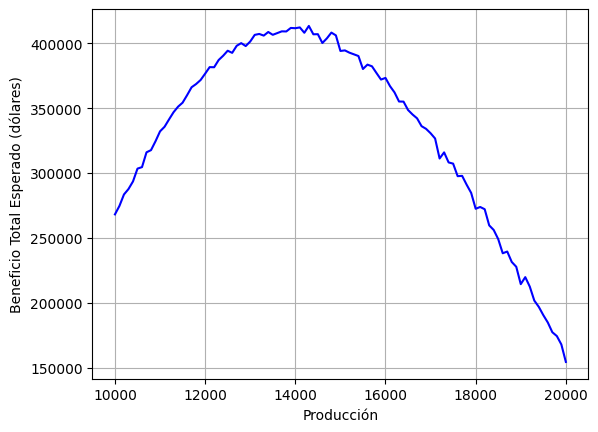

In [56]:
# Gráfica de beneficio total vs. cantidades de producción
plt.plot(df_resultados['Producción'], df_resultados['Beneficio Total Esperado (dólares)'], color='blue')
plt.xlabel('Producción')
plt.ylabel('Beneficio Total Esperado (dólares)')
plt.grid()
plt.show()

### Réplicas

In [53]:
# Registramos la iteración con el mayor beneficio total esperado en esta réplica
replicas = pd.concat([replicas, df_resultados.loc[df_resultados['Beneficio Total Esperado (dólares)'] == df_resultados['Beneficio Total Esperado (dólares)'].max()]])
replicas

,Producción,Beneficio Total Esperado (dólares)
36,13600,"414,759.14"
42,14200,"412,199.52"
37,13700,"410,436.01"
35,13500,"413,979.31"
43,14300,"411,343.45"
36,13600,"411,062.84"
39,13900,"413,144.42"
39,13900,"414,228.64"
40,14000,"412,476.67"
43,14300,"413,420.91"


### Criterio de Selección

In [55]:
print(replicas['Producción'].describe())

count       10.00
mean    13,900.00
std        298.14
min     13,500.00
25%     13,625.00
50%     13,900.00
75%     14,150.00
max     14,300.00
Name: Producción, dtype: float64
